### Table of Contents:
1. [Data Pre-processing](#Data-Pre-processing)
    * [Importing Datasets](#Importing-Datasets)
    * [Exploring Data](#Exploring-Data)
    * [Merging Dataframes](#Merging-Dataframes)
    * [Box Plot Analysis](#Box-Plot-Analysis)
    
    
2. [Classification](#Classification)
    * [Correlation Matrix](#Correlation-Matrix)
    * [Classification: Train-Test Split](#Classification:-Train-Test-Split)
    * [Classification: Feature Scaling](#Classification:-Feature-Scaling)
    * [Classification Models](#Classification:-Models)
        * [K Nearest Neighbor](#K-Nearest-Neighbor-Classifier)
        * [Linear SVM](#Linear-SVM)
        * [Logistic Regression](#Logistic-Regression)
        * [Kernalized SVM](#Kernalized-SVM)
        * [Decision Tree](#Decision-Tree)
        
        
3. [Classification Model Selection](#Model-Selection:-Logistic-Regression)


4. [Regression](#Regression)
    * [Regression: Train-Test Split](#Regression:-Train-Test-Split)
    * [Regression: Feature Scaling](#Regression:-Feature-Scaling)
    * [Regression Models](#Regression:-Models)
        * [K Nearest Regressor](#K-Nearest-Regressor)
        * [Linear Regression](#Linear-Regression)
        * [Polynomial Regression](#Polynomial-Regression)
        * [Ridge Regression](#Ridge-Regression)
        * [Lasso Regression](#Lasso-Regression)
        * [SVM Regressor](#SVM-Regressor)
        * [SGD Regressor](#SGD-Regressor)
    
    
5. [Regression: Model Selection](#Model-Selection:-Linear-Regression)   

# Data Pre-processing

In [1]:
#Importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

## Importing Datasets

In [2]:
audit_risk = pd.read_csv("audit_risk.csv")
trial = pd.read_csv("trial.csv")

## Exploring Data

In [3]:
audit_risk.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [4]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


Most columns from the 2 dataframes have similar feature names and also similar description. Some columns are in all capital letters, some have values in multiples of 10. The only columns in **'trial'** that are entirely differrent are **'Loss'** and **'Risk'**.

In [5]:
#Same columns as in Dataframe audit_risk
trial = trial.drop(["Sector_score", "LOCATION_ID", "PARA_A", "PARA_B", "TOTAL", "numbers", "Money_Value",
                    "Score", "SCORE_A", "History", "SCORE_B"], axis = 1)

In [6]:
trial.columns 

Index(['Marks', 'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE',
       'History_score', 'Risk'],
      dtype='object')

In [7]:
#Same columns from both dataframes (scaled by multiples of 10)
trial = trial.drop(["District", "Marks", "MONEY_Marks" ,
                    "LOSS_SCORE",  "History_score"], axis = 1) 

In [8]:
#Renaming Risk column from 'trial' dataframe to avoid confusion with 'trial' columns from 'audit_risk' dataframe.
trial.columns = ['Loss', 'Risk_trial']
trial.columns 

Index(['Loss', 'Risk_trial'], dtype='object')

## Merging Dataframes

In [9]:
merged_df = pd.concat([audit_risk, trial], axis = 1)
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Loss', 'Risk_trial'],
      dtype='object')

The dataframes have been succesfully merged.

In [10]:
df = merged_df.drop(['Risk_trial'], axis = 1)

Here, we deleted the 'Risk_trial' column which as originally 'Risk' from 'trial.csv' as it had some values that were different from the 'Risk' column from 'audit_risk.csv'. 

The paper provided by professor states that the values of 'Audit_Risk' being greater or equal to 1 are classified as 1 and 0 otherwise. 

This condition is being satisfied by the 'Risk' column in 'audit_risk.csv' and not by the 'Risk' column in 'trial.csv'.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 28 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

Money_Value has 1 missing value.

In [12]:
#Replacing the missing value by the median of the column
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [13]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Loss
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.119528,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041,0.029639
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.565444,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741,0.184280
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.587500,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000,0.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000,2.000000


'Detection_Risk' and 'Risk_F' have the same values throughout the columns. Deleting these columns.

In [14]:
df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 26 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
Score_A          776 non-null float64
Risk_A           776 non-null float64
PARA_B           776 non-null float64
Score_B          776 non-null float64
Risk_B           776 non-null float64
TOTAL            776 non-null float64
numbers          776 non-null float64
Score_B.1        776 non-null float64
Risk_C           776 non-null float64
Money_Value      776 non-null float64
Score_MV         776 non-null float64
Risk_D           776 non-null float64
District_Loss    776 non-null int64
PROB             776 non-null float64
RiSk_E           776 non-null float64
History          776 non-null int64
Prob             776 non-null float64
Score            776 non-null float64
Inherent_Risk    776 non-null float64
CONTROL_RISK     776 non-null float64
Audit_Risk       776 non-n

LOCATION_ID has object datatype. However there are numerical values in the column. There must be non-numeric values present.

In [16]:
#Unique values in LOCATION_ID column
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [17]:
print("These are the number of non-numeric values in LOCATION_ID: ", len(df[(df["LOCATION_ID"] == 'LOHARU') | (df["LOCATION_ID"] ==  'NUH') | (df["LOCATION_ID"] == 'SAFIDON')]))

These are the number of non-numeric values in LOCATION_ID:  3


In [18]:
#Deleting the rows with these 3 values as we have no information about the sequencing of the numbers present in the LCOATION_ID column.
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  773


Dropping duplicate values if any. 

In [19]:
df = df.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  760


In [20]:
#Number of unique values in each columns
for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

Sector_score : 13
LOCATION_ID : 42
PARA_A : 362
Score_A : 3
Risk_A : 362
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 470
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 327
Score_MV : 3
Risk_D : 327
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Score : 17
Inherent_Risk : 583
CONTROL_RISK : 11
Audit_Risk : 600
Risk : 2
Loss : 3


In [21]:
df.describe()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Loss
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,19.791303,14.913158,2.499382,0.354474,1.378992,11.026830,0.315526,6.467250,13.493844,5.069079,0.224211,1.156184,14.415282,0.292895,8.439143,2.510526,0.206316,0.520526,0.106579,0.217105,2.716842,18.021425,0.575263,7.311627,0.400000,0.030263
std,24.154233,9.935912,5.728092,0.174474,3.471049,50.584064,0.170780,30.373976,51.815320,0.267037,0.081120,0.542588,67.231807,0.160867,40.371807,1.233009,0.037890,0.291829,0.536380,0.068656,0.862102,55.263187,0.448001,39.060120,0.490221,0.186161
min,1.850000,1.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,2.000000,1.400000,0.400000,0.280000,0.000000,0.000000
25%,2.370000,8.000000,0.257500,0.200000,0.051500,0.000000,0.200000,0.000000,0.597500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,2.000000,1.594000,0.400000,0.318800,0.000000,0.000000
50%,3.890000,13.000000,0.915000,0.200000,0.183000,0.455000,0.200000,0.091000,1.430000,5.000000,0.200000,1.000000,0.105000,0.200000,0.021000,2.000000,0.200000,0.400000,0.000000,0.200000,2.400000,2.243000,0.400000,0.619400,0.000000,0.000000
75%,55.570000,19.000000,2.525000,0.600000,1.515000,4.482500,0.400000,2.113500,8.072500,5.000000,0.200000,1.000000,6.030000,0.400000,2.412000,2.000000,0.200000,0.400000,0.000000,0.200000,3.400000,11.064500,0.400000,3.469800,1.000000,0.000000
max,59.850000,44.000000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.200000,801.262000,5.800000,961.514400,1.000000,2.000000


## Box Plot Analysis

Text(0.5,1,'Before Outlier Removal')

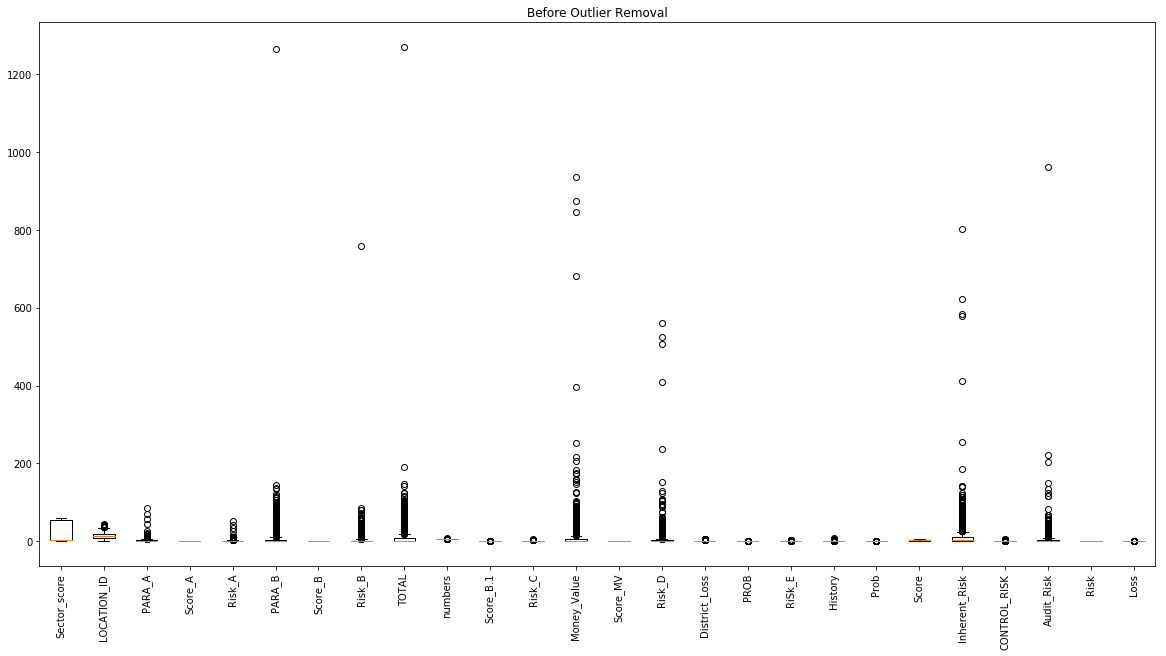

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make the figures big enough for the optically challenged.
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#box plot the numerical attributes
#convert data frame to array for plotting
#plot_df = df.iloc[:,:]
plt.boxplot(df.values)
# Nice labels using attribute names on the x-axis.
plt.xticks(range(1,len(df.columns)+1), df.columns, rotation = 'vertical')
plt.title('Before Outlier Removal')
#show()

The data has many outliers. Even the target column for regression i.e. has extreme values. 

This can be mainly because Audit_Risk = Inherent_Risk x CONTROL_RISK x Detection_Risk (as quoted in the paper provided by professor).

Since Inherent_Risk has outliers, the target column Audit_Risk too has outliers.

In [23]:
#Function to replace values by median in columns where the value exceeds a certain percentile rank value. 
def outlier_removal(df, percentile): 
    limit = df.quantile(percentile)
    df[df > limit] = df.median()
    
#Only removing outliers from columns having larger numbers of unqiue values and extreme values.
outlier_removal(df["PARA_A"], 0.75)
outlier_removal(df["Risk_A"], 0.75)
outlier_removal(df["PARA_B"], 0.75)
outlier_removal(df["Risk_B"], 0.75)
outlier_removal(df["TOTAL"], 0.75)
outlier_removal(df["Money_Value"], 0.75)
outlier_removal(df["Risk_D"], 0.75)
outlier_removal(df["Inherent_Risk"], 0.75)

# Classification

In [24]:
#Creating a new dataframe for classification by deleting the Audit_Risk column.
class_df = df.drop("Audit_Risk", axis = 1)

## Correlation Matrix

In [25]:
import seaborn as sns
corr = class_df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Risk,Loss
Sector_score,1,-0.052,-0.26,-0.42,-0.17,-0.068,-0.21,-0.04,-0.18,-0.15,-0.17,-0.16,-0.1,-0.32,-0.094,-0.11,-0.086,-0.13,-0.11,-0.14,-0.33,-0.18,-0.16,-0.39,-0.082
LOCATION_ID,-0.052,1,0.02,0.079,0.0015,0.0065,0.13,0.03,-0.00077,0.0067,-0.018,-0.015,0.0079,0.11,0.018,-0.11,-0.0034,-0.097,-0.082,-0.054,0.088,0.044,-0.12,0.063,0.0064
PARA_A,-0.26,0.02,1,0.64,0.91,0.11,0.33,0.086,0.46,0.11,0.12,0.11,0.14,0.24,0.15,0.054,0.05,0.059,0.091,0.12,0.41,0.32,0.092,0.33,0.039
Score_A,-0.42,0.079,0.64,1,0.46,0.16,0.57,0.14,0.46,0.24,0.27,0.26,0.15,0.47,0.16,0.086,0.091,0.1,0.18,0.26,0.72,0.4,0.17,0.62,0.091
Risk_A,-0.17,0.0015,0.91,0.46,1,0.081,0.2,0.076,0.39,0.034,0.035,0.035,0.16,0.14,0.18,0.03,0.013,0.027,0.067,0.066,0.26,0.27,0.059,0.21,0.0034
PARA_B,-0.068,0.0065,0.11,0.16,0.081,1,0.33,0.68,0.47,0.079,0.094,0.094,0.12,0.067,0.1,-0.0015,0.035,-0.0034,0.11,0.058,0.26,0.32,0.074,0.16,0.04
Score_B,-0.21,0.13,0.33,0.57,0.2,0.33,1,0.27,0.3,0.28,0.31,0.3,0.2,0.56,0.2,-0.0077,0.091,0.012,0.2,0.31,0.9,0.23,0.12,0.63,0.097
Risk_B,-0.04,0.03,0.086,0.14,0.076,0.68,0.27,1,0.39,0.02,0.035,0.032,0.062,0.039,0.058,0.036,0.046,0.034,0.063,0.051,0.21,0.29,0.064,0.13,0.051
TOTAL,-0.18,-0.00077,0.46,0.46,0.39,0.47,0.3,0.39,1,0.047,0.056,0.057,0.2,0.094,0.18,0.022,0.042,0.033,0.057,0.052,0.31,0.49,0.059,0.24,0.042
numbers,-0.15,0.0067,0.11,0.24,0.034,0.079,0.28,0.02,0.047,1,0.91,0.96,-0.045,0.45,-0.034,0.12,0.035,0.14,0.2,0.21,0.5,-0.05,0.23,0.31,-0.0024


There are some interesting correlations. Let's keep the top 10 correlated columns with the target column 'Risk' for the classification problem.

In [26]:
#Keeping the top 10 correlated pairs with Risk
class_df = class_df.loc[:,["Score_A", "Score_B", "Score_MV", "Score", "RiSk_E", "District_Loss",
               "CONTROL_RISK", "Score_B.1","Sector_score","Inherent_Risk", "Risk"]]

In [27]:
classification_X = class_df.drop(["Risk"], axis = 1)
classification_y = class_df["Risk"]

## Classification: Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(classification_X, classification_y,
                                                            test_size = 0.25, random_state = 0)

## Classification: Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

## Classification: Models

The following classifiers are implemented in the next part:
* K Nearest Neighbor
* Linear SVM
* Logistic Regression
* Kernalized SVM
* Decision Tree    


Here, we are considering AUC-ROC score for evaluation as the goal of AUC is to deal with situations where you have a very skewed sample distribution, and don't want to overfit to a single class. 

## K Nearest Neighbor Classifier

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#Grid Search Cross-Validation for hyperparameter tuning

param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10, 15]}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 10, scoring='roc_auc')
grid_knn.fit(X_train_org, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
print("KNN Training Score: ",grid_knn.score(X_train_org, y_train))

KNN Training Score:  0.9982956884132537


In [32]:
print("KNN Testing Score: ", grid_knn.score(X_test_org, y_test))

KNN Testing Score:  0.9965659340659341


In [33]:
print("Best Parameters for KNN: ", grid_knn.best_params_)

Best Parameters for KNN:  {'n_neighbors': 9}


In [34]:
print("KNN Mean Test Scores: ",grid_knn.cv_results_['mean_test_score'])

KNN Mean Test Scores:  [0.9797389  0.98150607 0.98568829 0.98536981 0.9850506  0.98619625
 0.98699269 0.98634832 0.98683468]


In [35]:
y_knn_predict = grid_knn.predict(X_test_org)
y_knn_train_predict = grid_knn.predict(X_train_org)

In [36]:
from sklearn.metrics import roc_auc_score
print('Train ROC AUC Score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test ROC AUC Score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train ROC AUC Score: 0.97
Test ROC AUC Score: 0.96 


In [37]:
train_score_list = []
test_score_list = []
x_range = [3, 4, 5, 6, 7, 8, 9, 10, 15]

for alpha in x_range: 
    model = KNeighborsClassifier(n_neighbors=alpha)
    model.fit(X_train_org,y_train)
    train_score_list.append(model.score(X_train_org,y_train))
    test_score_list.append(model.score(X_test_org, y_test))   

Text(0.5,0,'n_neighbors')

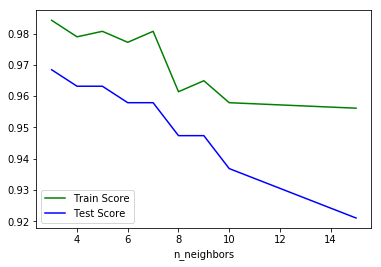

In [38]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 3)
plt.xlabel(r'n_neighbors')


In [39]:
report_table = [['KNN', 'K = 3', grid_knn.score(X_train_org, y_train), 
                 grid_knn.score(X_test_org, y_test), roc_auc_score(y_knn_train_predict, y_train),
                 roc_auc_score(y_knn_predict, y_test) ]]

## Linear SVM

In [40]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)
grid_svc_lin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [41]:
print("Linear SVC Training Score: ", grid_svc_lin.score(X_train, y_train))

Linear SVC Training Score:  0.9975560814982507


In [42]:
print("Linear SVC Testing Score: ",grid_svc_lin.score(X_test, y_test))

Linear SVC Testing Score:  0.9985119047619047


In [43]:
print("Best Parameters for Linear SVC: ", grid_svc_lin.best_params_)

Best Parameters for Linear SVC:  {'C': 10}


In [44]:
print("Linear SVC Mean Test Scores: ", grid_svc_lin.cv_results_['mean_test_score'])

Linear SVC Mean Test Scores:  [0.97707724 0.99056665 0.99586884 0.99671126 0.99677812 0.9965185 ]


In [45]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)

In [46]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LinearSVC(C=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'C')

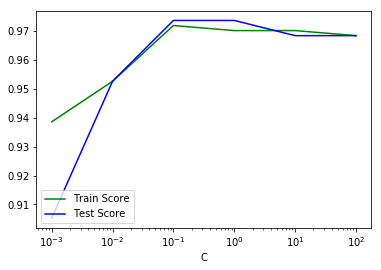

In [47]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [48]:
report_table = report_table + [['LinearSVC', 'C = 10', grid_svc_lin.score(X_train, y_train),
                                grid_svc_lin.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train),
                                roc_auc_score(y_svc_lin_predict, y_test)]]

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
grid_log_reg = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
grid_log_reg.fit(X_train, y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
print("Logistic Regression Training Score: ", grid_log_reg.score(X_train, y_train))

Logistic Regression Training Score:  0.9719298245614035


In [51]:
print("Logistic Regression Testing Score: ", grid_log_reg.score(X_test, y_test))

Logistic Regression Testing Score:  0.9736842105263158


In [52]:
print("Best Parameters for Logistic Regression: ", grid_log_reg.best_params_)

Best Parameters for Logistic Regression:  {'C': 10}


In [53]:
print("Logistic Regression Mean Test Scores: ", grid_log_reg.cv_results_['mean_test_score'])

Logistic Regression Mean Test Scores:  [0.90877193 0.94035088 0.93508772 0.95789474 0.96315789 0.96140351]


In [54]:
y_log_predict_train = grid_log_reg.predict(X_train)
y_log_predict = grid_log_reg.predict(X_test)

In [55]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = LogisticRegression(C=alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'C')

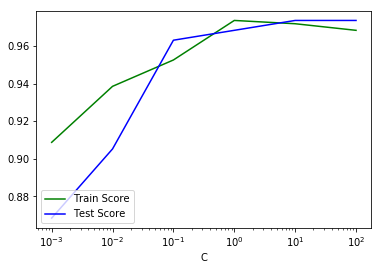

In [56]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [57]:
report_table = report_table + [['Logistic Regression', 'C = 10', grid_log_reg.score(X_train, y_train),
                                grid_log_reg.score(X_test, y_test), roc_auc_score(y_log_predict_train, y_train),
                                roc_auc_score(y_log_predict, y_test)]]

## Kernalized SVM

In [58]:
from sklearn.svm import SVC
kernel = SVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_kernel = GridSearchCV(kernel, param_grid, cv = 5, scoring = 'roc_auc', return_train_score=True)
grid_kernel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [59]:
print("Kernalized SVM Training Score: ", grid_kernel.score(X_train, y_train))

Kernalized SVM Training Score:  0.9982635315908623


In [60]:
print("Kernalized SVM Testing Score: ", grid_kernel.score(X_test, y_test))

Kernalized SVM Testing Score:  0.9985119047619048


In [61]:
print("Best Parameters for Kernalized SVM: ", grid_kernel.best_params_)

Best Parameters for Kernalized SVM:  {'C': 10}


In [62]:
print("Kernalized SVM Mean Test Scores: ", grid_kernel.cv_results_['mean_test_score'])

Kernalized SVM Mean Test Scores:  [0.98355529 0.98349257 0.98877036 0.99374167 0.99787347 0.99716307]


In [63]:
y_ker_predict_train = grid_kernel.predict(X_train)
y_ker_predict = grid_kernel.predict(X_test)

In [64]:
train_score_list = []
test_score_list = []
x_range = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in x_range: 
    model = SVC(C = alpha)
    model.fit(X_train,y_train)
    train_score_list.append(model.score(X_train,y_train))
    test_score_list.append(model.score(X_test, y_test))

Text(0.5,0,'C')

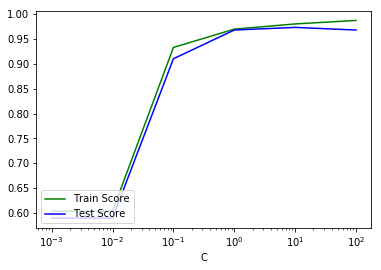

In [65]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

In [66]:
report_table = report_table + [['Kernalized SVM', 'C = 10', grid_kernel.score(X_train, y_train),
                                grid_kernel.score(X_test, y_test), roc_auc_score(y_ker_predict_train, y_train),
                                roc_auc_score(y_ker_predict, y_test)]]

## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': np.arange(5, 20)}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid,cv = 5, scoring='roc_auc', return_train_score=True)
grid_tree.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [68]:
print("Decision Tree Training Score: ", grid_tree.score(X_train_org, y_train))

Decision Tree Training Score:  0.9983342766001235


In [69]:
print("Decision Tree Testing Score: ", grid_tree.score(X_test_org, y_test))

Decision Tree Testing Score:  0.9847756410256411


In [70]:
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)

Best Parameters for Decision Tree:  {'max_depth': 5}


In [71]:
print("Decision Tree Mean Test Scores: ", grid_tree.cv_results_['mean_test_score'])

Decision Tree Mean Test Scores:  [0.9872557  0.98457793 0.98607806 0.98607806 0.98607806 0.98385584
 0.98385584 0.98385584 0.98607806 0.98385584 0.98385584 0.98607806
 0.98607806 0.98607806 0.98607806]


In [72]:
y_tree_predict_train = grid_tree.predict(X_train_org)
y_tree_predict = grid_tree.predict(X_test_org)

In [73]:
train_score_list = []
test_score_list = []
x_range = np.arange(5, 20)

for alpha in x_range: 
    model = DecisionTreeClassifier(max_depth=alpha)
    model.fit(X_train_org,y_train)
    train_score_list.append(model.score(X_train_org,y_train))
    test_score_list.append(model.score(X_test_org, y_test))

Text(0.5,0,'Max Depth')

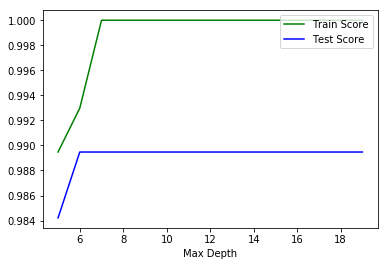

In [74]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('linear')
plt.legend(loc = 1)
plt.xlabel('Max Depth')

In [75]:
report_table = report_table + [['Decision Tree', 'd = 7', grid_tree.score(X_train_org, y_train),
                                grid_tree.score(X_test_org, y_test), roc_auc_score(y_tree_predict_train, y_train),
                                roc_auc_score(y_tree_predict, y_test)]]

In [76]:
report = pd.DataFrame(report_table,columns = ['Model Name', 'Model Parameter', 'Training Accuracy',
                                              'Testing Accuracy', 'Training AUC score', 'Testing AUC score'])

In [77]:
report.index = report['Model Name']

In [78]:
report.head(10)

,Model Name,Model Parameter,Training Accuracy,Testing Accuracy,Training AUC score,Testing AUC score
Model Name,,,,,,
KNN,KNN,K = 3,0.998296,0.996566,0.972527,0.959016
LinearSVC,LinearSVC,C = 10,0.997556,0.998512,0.968514,0.969298
Logistic Regression,Logistic Regression,C = 10,0.971930,0.973684,0.970029,0.973739
Kernalized SVM,Kernalized SVM,C = 10,0.998264,0.998512,0.979496,0.975942
Decision Tree,Decision Tree,d = 7,0.998334,0.984776,0.990564,0.986957


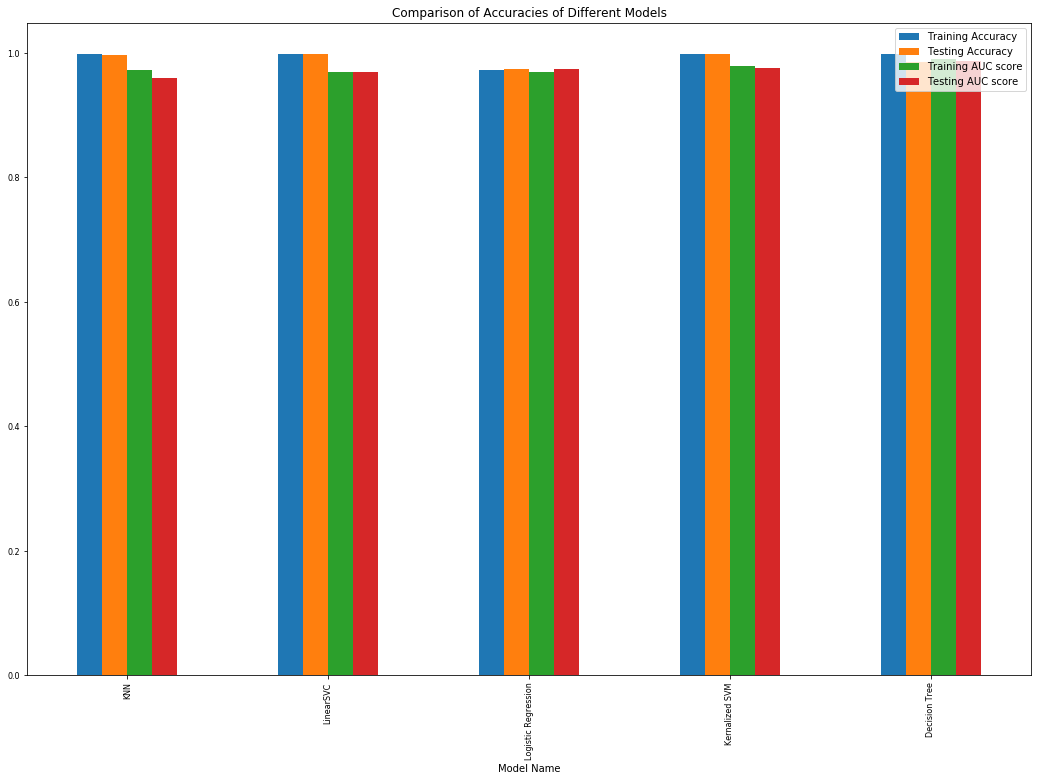

In [79]:
ax = report[['Training Accuracy','Testing Accuracy','Training AUC score', 'Testing AUC score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(18, 12), fontsize = 8)
plt.show()

**Logistic Regression** seems to be the best fit model with not overfitting the data and at the same time not underfitting the data.

# Model Selection: Logistic Regression

In [80]:
class_model = LogisticRegression(penalty='l2', C = 10)
class_model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
print("Classification Training Score: ", class_model.score(X_train, y_train))

Classification Training Score:  0.9719298245614035


In [82]:
print("Classification Testing Score: ", class_model.score(X_test, y_test))

Classification Testing Score:  0.9736842105263158


In [83]:
class_prediction = class_model.predict(X_test)
print("Predicted class for 1st testing row: ", class_prediction[0])
print("Original class for 1st testing row: ", y_test.values[0])

print("Predicted class for 5th testing row: ", class_prediction[4])
print("Original class for 5th testing row: ", y_test.values[4])

Predicted class for 1st testing row:  0.0
Original class for 1st testing row:  0.0
Predicted class for 5th testing row:  1.0
Original class for 5th testing row:  1.0


As we can see our model works pretty well on the test data as well. 

**Training and testing score of around 0.97 was achieved using Logistic Regression for classification.**

# Regression

As seen in the box plot analysis, the target column for regression, 'Audit_Risk' has a lot of extreme values. 

In order to correctly design the model, it is only fair to use the columns with minimum error in the target variable. 

Therefore, we delete the rows having outliers in their target columns. Not doing so and using techniques like replacing the outliers by median values for target variable results in overfitting which is highly undesirable.

In [84]:
#Removing rows where Audit_Risk value exceeds its 75th percentile (possible outliers)
limit = df["Audit_Risk"].quantile(0.75)
df = df[df["Audit_Risk"] <= limit] 

#Deleting 'Risk' column
regression_df = df.drop("Risk", axis = 1)

In [85]:
regression_X = regression_df.drop(["Audit_Risk"], axis = 1)
regression_y = regression_df["Audit_Risk"]

## Regression: Train-Test Split

In [86]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(regression_X, regression_y, test_size = 0.25, random_state = 0)

## Regression: Feature Scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

# Regression: Models

The following regression models are implemented in the next part:
* K Nearest Regressor
* Linear Regression
* Polynomial Regression
* Ridge Regression
* Lasso Regression
* SVM Regressor
* SGD Regressor

## K Nearest Regressor

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[3,4,5,6,7,8,9,10,15]}

knn = KNeighborsRegressor()

grid_knn_reg = GridSearchCV(knn, params, cv=5, scoring='r2')
grid_knn_reg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [89]:
print("KNN Regressor Training Score: ", grid_knn_reg.score(X_train, y_train))

KNN Regressor Training Score:  0.9270949128394056


In [90]:
print("KNN Regressor Testing Score: ", grid_knn_reg.score(X_test, y_test))

KNN Regressor Testing Score:  0.7948919163764245


In [91]:
print("Best Parameters for KNN Regressor: ", grid_knn_reg.best_params_)

Best Parameters for KNN Regressor:  {'n_neighbors': 3}


In [92]:
print("KNN Regressor Mean Test Scores: ", grid_knn_reg.cv_results_['mean_test_score'])

KNN Regressor Mean Test Scores:  [0.82355748 0.80275941 0.77564128 0.76295357 0.74430195 0.7291136
 0.70934322 0.70324332 0.66720334]


Text(0,0.5,'Score')

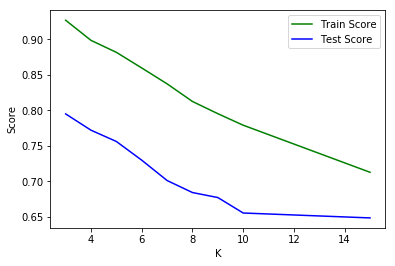

In [93]:
knn_reg_train_score = []
knn_reg_test_score = []

for k in (3,4,5,6,7,8,9,10,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    knn_reg_train_score.append(knn_reg.score(X_train, y_train))
    knn_reg_test_score.append(knn_reg.score(X_test, y_test))


x_axis = [3,4,5,6,7,8,9,10,15]
plt.plot(x_axis, knn_reg_train_score, c = 'g', label = 'Train Score')
plt.plot(x_axis, knn_reg_test_score, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('K')
plt.ylabel('Score')

In [94]:
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train, y_train)
knn_reg_train_score = knn_reg.score(X_train, y_train)
knn_reg_test_score = knn_reg.score(X_test, y_test)

In [95]:
report_table_1 = ['KNN Regressor', 'n_neighbors = 3', knn_reg_train_score, knn_reg_test_score]

## Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
print("Linear Regression Training Score:", lreg.score(X_train, y_train))

Linear Regression Training Score: 0.9133188215011069


In [98]:
print("Linear Regression Testing Score:", lreg.score(X_test, y_test))

Linear Regression Testing Score: 0.8762463058383532


In [99]:
CV_Score = cross_val_score(lreg, X_train, y_train)
print("Linear Regression Cross Validation Scores:", CV_Score)

Linear Regression Cross Validation Scores: [0.90372828 0.75886924 0.90935137]


In [100]:
report_table_2 = ['Linear Regression', 'Simple', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]

## Polynomial Regression

In [101]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
poly_train_score = (lreg.score(X_train_poly, y_train))
poly_test_score = (lreg.score(X_test_poly, y_test))
    
print("Polynomial Regression Training Score: ", poly_train_score)
print("Polynomial Regression Testing Score: ", poly_test_score)

Polynomial Regression Training Score:  1.0
Polynomial Regression Testing Score:  0.7282843937652518


In [103]:
report_table_3 = ['Polynomial Regression', 'Order = 3', poly_train_score, poly_test_score]

## Ridge Regression

In [104]:
from  sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [105]:
print ("Ridge Train Scores: ", train_score_list)
print ("Ridge Test Scores: ", test_score_list)

Ridge Train Scores:  [0.9132908913302145, 0.9129217662838557, 0.9093550583344013, 0.8588788298304887, 0.549234290837739]
Ridge Test Scores:  [0.8755407303320987, 0.8734387578970199, 0.8680168495766374, 0.8080761779068116, 0.49486992245026273]


Text(0.5,0,'$\\alpha$')

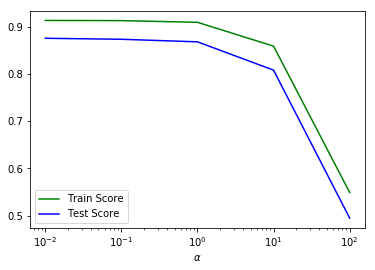

In [106]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

alpha = 0.01 looks like the best fit.

In [107]:
ridge = Ridge(alpha = 0.01)    
ridge.fit(X_train,y_train)
print('Ridge Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Ridge Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Ridge Train score: 0.9133
Ridge Test score: 0.8755


In [108]:
report_table_4 = ['Ridge Regression', 'Alpha = 0.01', ridge.score(X_train, y_train), ridge.score(X_test, y_test)]

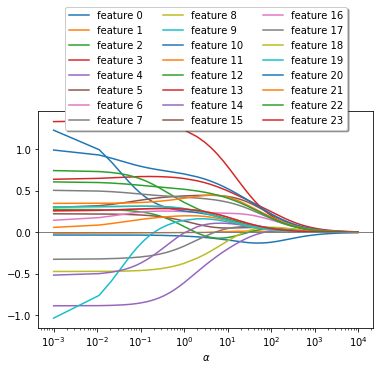

In [109]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,len(regression_X.columns)):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso Regression

In [110]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter = 10000)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

In [111]:
print ("Lasso Train Scores: ", train_score_list)
print ("Lasso Test Scores: ", test_score_list)

Lasso Train Scores:  [0.8565373498099054, 0.12518496765485265, 0.0, 0.0]
Lasso Test Scores:  [0.8241339064525572, 0.09370847899554258, -0.015421938887612452, -0.015421938887612452]


Text(0.5,0,'$\\alpha$')

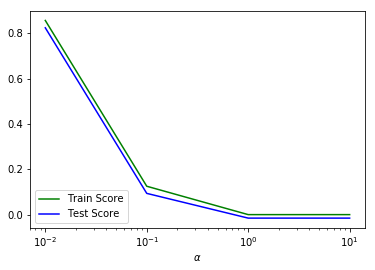

In [112]:
%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$') 

alpha = 0.01 looks like the best fit.

In [113]:
lasso = Lasso(alpha = 0.01, max_iter=10000)
lasso.fit(X_train,y_train)

lasso_train_score = lasso.score(X_train,y_train)
lasso_test_score = lasso.score(X_test,y_test)

print ("Lasso Train Score: ", lasso_train_score)
print ("Lasso Test Score: ", lasso_test_score)

Lasso Train Score:  0.8565373498099054
Lasso Test Score:  0.8241339064525572


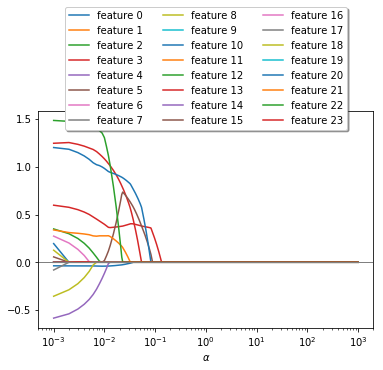

In [114]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,len(regression_X.columns)):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [115]:
report_table_5 = ['Lasso Regression', 'Alpha = 0.01', lasso_train_score, lasso_test_score]

## SVM Regressor

In [116]:
from sklearn import svm

parameters = {'kernel': ('linear', 'rbf'), 'gamma': [0.01, 0.1, 1 , 10],'epsilon':[0.1,0.2,0.5,0.3], 'C':[0.1, 1, 10, 100]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'gamma': [0.01, 0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3], 'C': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
print("SVM Regressor Best Parameters: ", clf.best_params_)

SVM Regressor Best Parameters:  {'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [118]:
clf = svm.SVR(kernel='rbf', gamma=0.1, epsilon=0.1, C = 100)
clf.fit(X_train, y_train)
svr_train_score = clf.score(X_train, y_train)
svr_test_score = clf.score(X_test, y_test)

print("SVM Regressor Training Score: ", svr_train_score)
print("SVM Regressor Testing Score: ", svr_test_score)

SVM Regressor Training Score:  0.9910150621107752
SVM Regressor Testing Score:  0.8992990589747598


In [119]:
report_table_6 = ['Support Vector Regression', 'RBF Kernel, gamma = 0.1, epsilon = 0.1', svr_train_score, svr_test_score]

## SGD Regressor

In [120]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

sgd_reg = SGDRegressor(random_state= 0)

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal'],
}

grid_sgd = GridSearchCV(sgd_reg, param_grid)
grid_sgd.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=0, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber'], 'penalty': ['l2', 'l1'], 'learning_rate': ['constant', 'optimal']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [121]:
print(grid_sgd.best_score_)

0.7889902017868703


In [122]:
print("Best Parameters for SGD Regressor: ", grid_sgd.best_params_)

Best Parameters for SGD Regressor:  {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'huber', 'penalty': 'l2'}


In [123]:
sgd_reg = SGDRegressor(random_state = 0, alpha = 0.001 , max_iter = 3000,
                       learning_rate = 'optimal', loss = 'huber', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
sgd_train_score = sgd_reg.score(X_train, y_train)
sgd_test_score = sgd_reg.score(X_test, y_test)
print("SGD Regressor Training Score: ", sgd_train_score)
print("SGD Regressor Testing Score: ", sgd_test_score)

SGD Regressor Training Score:  0.8349713803018537
SGD Regressor Testing Score:  0.7808737266810969


In [124]:
report_table_7 = ['SGD Regressor', 'huber, alpha = 0.001', sgd_train_score, sgd_test_score]

### Generating a Report table
For comparing all the models, we will create a table and a plot.

In [125]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5,
             report_table_6,
             report_table_7))).transpose()

In [126]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']

In [127]:
report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN Regressor,KNN Regressor,n_neighbors = 3,0.927095,0.794892
Linear Regression,Linear Regression,Simple,0.913319,0.876246
Polynomial Regression,Polynomial Regression,Order = 3,1,0.728284
Ridge Regression,Ridge Regression,Alpha = 0.01,0.913291,0.875541
Lasso Regression,Lasso Regression,Alpha = 0.01,0.856537,0.824134
Support Vector Regression,Support Vector Regression,"RBF Kernel, gamma = 0.1, epsilon = 0.1",0.991015,0.899299
SGD Regressor,SGD Regressor,"huber, alpha = 0.001",0.834971,0.780874


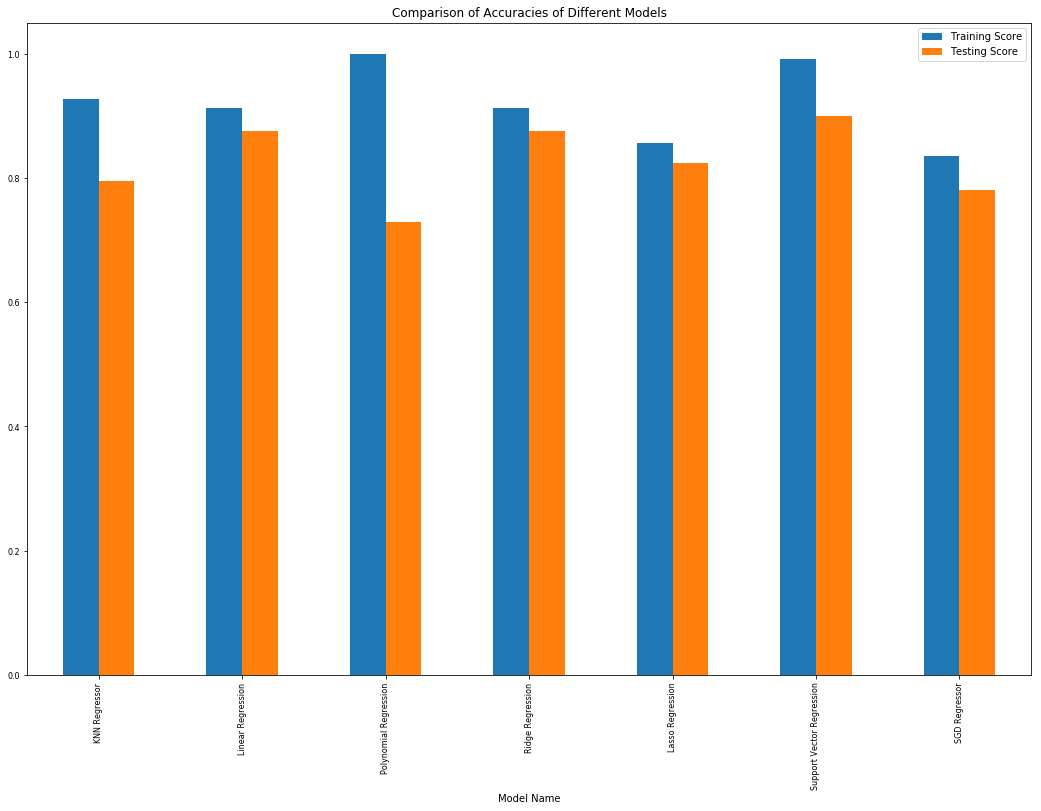

In [128]:
ax = report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(18, 12), fontsize = 8)
plt.show()

**Linear Regression** seems to be the best fit model with not overfitting the data and at the same time not underfitting the data.

# Model Selection: Linear Regression

In [129]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
print("Linear Regression Training Score:", reg_model.score(X_train, y_train))
print("Linear Regression Testing Score:", reg_model.score(X_test, y_test))

Linear Regression Training Score: 0.9133188215011069
Linear Regression Testing Score: 0.8762463058383532


In [131]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = reg_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_predicted))

print("Linear Regression Root Mean Squared Error (RMSE):", rmse)

Linear Regression Root Mean Squared Error (RMSE): 0.22578404398844884


In [132]:
print("Predicted value for 1st testing row: ", y_predicted[0])
print("Original value for 1st testing row: ", y_test.values[0])
print("")
print("Predicted value for 5th testing row: ", y_predicted[4])
print("Original value for 5th testing row: ", y_test.values[4])

Predicted value for 1st testing row:  0.2754632857814737
Original value for 1st testing row:  0.294

Predicted value for 5th testing row:  0.3456467160222236
Original value for 5th testing row:  0.3104


As we can see our model works pretty well on the test data as well.

**RMSE of 0.22 was achieved. Training and testing score of around 0.91 and 0.87 was achieved using Linear Regression for regression.** 